In [74]:
# Exploratory data analysis(EDA).
# Objectives:
# - Formulate assumptions and hypotheses for the further construction of the model.
# -Check data quality and clean it if necessary.
# - Decide on the parameters of the model.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # show more lines
pd.set_option('display.max_columns', 50) # show more lines
stud_math = pd.read_csv('stud_math.csv')

In [29]:
# consider what data is stored in the dataset

In [30]:
display(stud_math)
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [31]:
# almost all columns are more than ~90% full

In [32]:
# Look at the name of columns
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [33]:
# we can't watch the column 'studytime, granular' in description. Lets look info

In [34]:
display(stud_math['studytime, granular'].describe())
display(stud_math['studytime, granular'].value_counts())

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

In [35]:
# It's nominative column with value interval [-12:-3] 

In [36]:
# Create lists with objects, nominative(with value inteval) and numerical columns.
obj_col = ['school', 'sex','address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']
int_col = ['age', 'absences', 'score']
nom_col = [['Medu',0,4], ['Fedu',0,4], ['traveltime',1,4], ['studytime',1,4], ['failures',0,3], ['studytime, granular',-3,-12], ['famrel',1,5],
       ['freetime',1,5], ['goout',1,5], ['health',1,5]]

In [37]:
# Create the function to correct dataframe
# about_obj - for object change skips to none and get info
# about_nom - for nominative columns change skips to none, del values out of interval and get info
# about_int - for numerical columns get info

In [38]:
def about_obj(columns):
    for column in columns:
        stud_math[column] = stud_math[column].astype(str).apply(lambda x: None if x.strip() == '' else None if x.strip()=='nan' else x)
        display(stud_math[column].value_counts())
        print("Значений, встретившихся в столбце более 10 раз:", (stud_math[column].value_counts()>10).sum())
        print("Уникальных значений:", stud_math[column].nunique())
        print("Пропущенно значений:", stud_math[column].isnull().sum())
        stud_math.loc[:,[column]].info()

In [45]:
def about_nom(columns):
    for column in columns:
        stud_math[column[0]] = stud_math[column[0]].apply(lambda x: None if x == 'nan' else None if x>column[2] else None if x<column[1] else x)
        display(stud_math[column[0]].value_counts())
        print("Уникальных значений:", stud_math[column[0]].nunique())
        print("Пропущенно значений:", stud_math[column[0]].isnull().sum())

In [62]:
def about_int(column):
    display(stud_math[column].describe())
    stud_math[column].hist()
    display(stud_math[column].value_counts())
    print("Пропущенно значений:", stud_math[column].isnull().sum())

In [41]:
# Lets look at object columns
about_obj(obj_col)

GP    349
MS     46
Name: school, dtype: int64

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пропущенно значений: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


F    208
M    187
Name: sex, dtype: int64

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пропущенно значений: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


U    295
R     83
Name: address, dtype: int64

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пропущенно значений: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


GT3    261
LE3    107
Name: famsize, dtype: int64

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пропущенно значений: 27
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


T    314
A     36
Name: Pstatus, dtype: int64

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пропущенно значений: 45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Пропущенно значений: 19
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Пропущенно значений: 36
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
Пропущенно значений: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


mother    250
father     86
other      28
Name: guardian, dtype: int64

Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
Пропущенно значений: 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


no     335
yes     51
Name: schoolsup, dtype: int64

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пропущенно значений: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    219
no     137
Name: famsup, dtype: int64

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пропущенно значений: 39
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


no     200
yes    155
Name: paid, dtype: int64

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пропущенно значений: 40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    195
no     186
Name: activities, dtype: int64

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пропущенно значений: 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    300
no      79
Name: nursery, dtype: int64

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пропущенно значений: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    356
no      19
Name: higher, dtype: int64

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пропущенно значений: 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


yes    305
no      56
Name: internet, dtype: int64

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пропущенно значений: 34
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


no     240
yes    124
Name: romantic, dtype: int64

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Пропущенно значений: 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [61]:
# Lets look at nominative columns
about_nom(nom_col)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

Уникальных значений: 5
Пропущенно значений: 3


2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: Fedu, dtype: int64

Уникальных значений: 5
Пропущенно значений: 25


1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Уникальных значений: 4
Пропущенно значений: 28


2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

Уникальных значений: 4
Пропущенно значений: 7


0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

Уникальных значений: 4
Пропущенно значений: 22


Series([], Name: studytime, granular, dtype: int64)

Уникальных значений: 0
Пропущенно значений: 395


4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

Уникальных значений: 5
Пропущенно значений: 28


3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

Уникальных значений: 5
Пропущенно значений: 11


3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

Уникальных значений: 5
Пропущенно значений: 8


5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

Уникальных значений: 5
Пропущенно значений: 15


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Пропущенно значений: 0


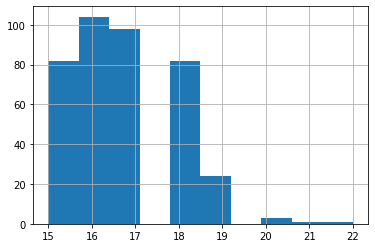

In [63]:
# Lets look at the numerical column 'age'
about_int('age')

In [64]:
# most students are 15-18 years old
# no emissions, all ages 15-22

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Пропущенно значений: 12


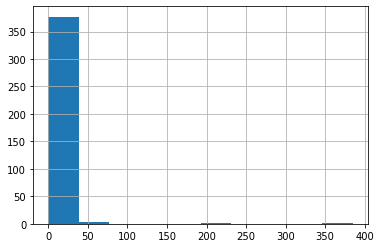

In [65]:
# Lets look at the numerical column 'absences'
about_int('absences')

In [75]:
# A little more than a quarter of students did not miss a single lesson 
# It is interesting, that more than unique values in the number of passes are a multiple of 2, we can assume that classes are most likely to be conducted in pairs.
# There are obvious emissions: 385 and 212, in connection with them our average is almost equal to 75 percent and a huge std
# There are many in up to 30. Value 30 will be the border of emmissions

In [76]:
# del emissions in 'absences'
stud_math['absences'] = stud_math['absences'].apply(lambda x: None if x>30 else x)

count    376.000000
mean       5.127660
std        5.854656
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       30.000000
Name: absences, dtype: float64

Border of emmissions is [0:30]


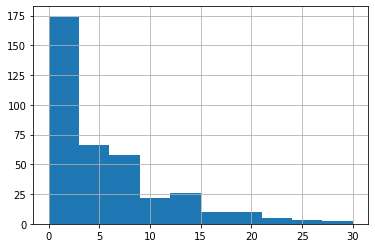

In [80]:
# Look again at 'absences'
display(stud_math['absences'].hist())
display(stud_math['absences'].describe())
print('Border of emmissions is [0:30]')

In [78]:
# Now we have adequate mean and std

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Пропущенно значений: 6


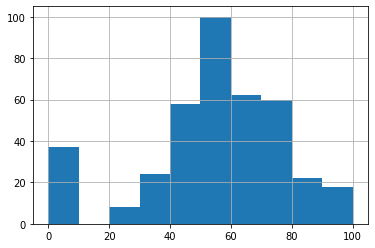

In [79]:
# Lets look at the numerical column 'score'. 
about_int('score')

In [ ]:
# Interesting, there are 37 values = 0, apparently, this is the number of students, who did not attend the exam.
# The values are multiples of 5, which indicates to us that the minimum score for the completed task = 5

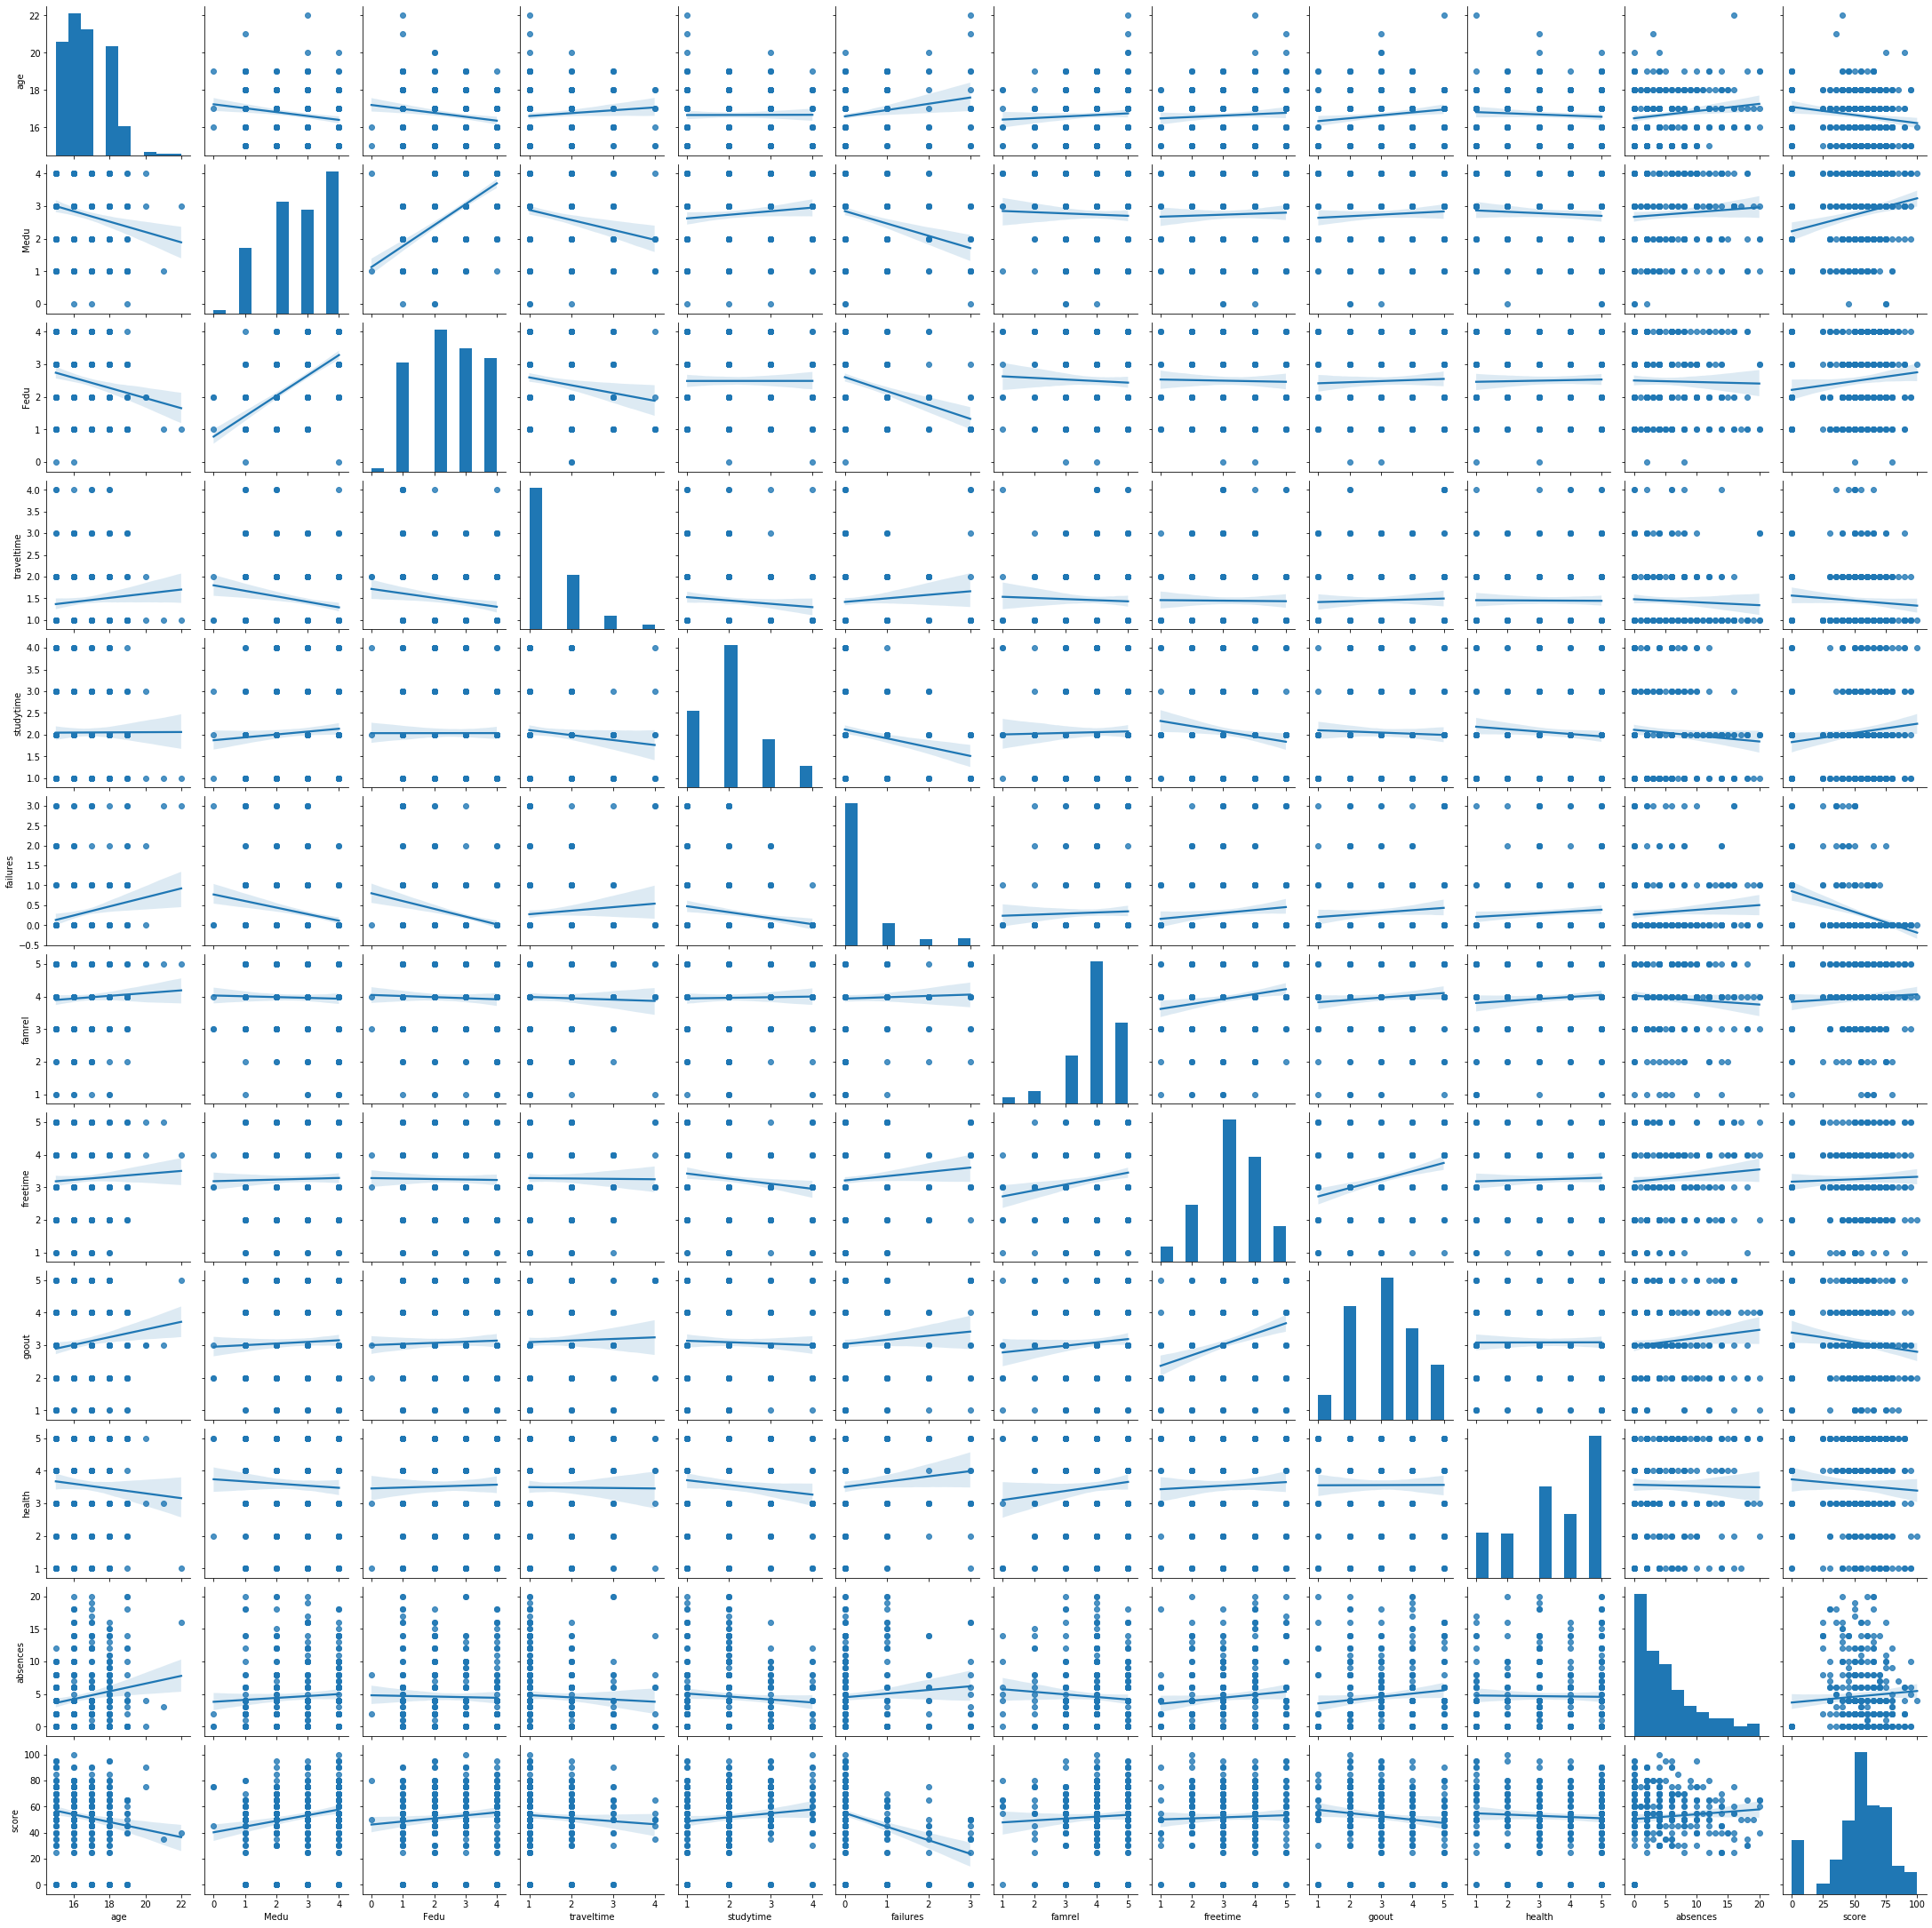

In [70]:
# Get 
sns.pairplot(stud_math, kind = 'reg')

In [71]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.182463,-0.181020,0.085659,0.003035,0.195400,0.059219,0.058193,0.135466,-0.067958,0.151493,-0.159306
Medu,-0.182463,1.000000,0.634066,-0.197009,0.085532,-0.249754,-0.030272,0.027861,0.049094,-0.052316,0.065712,0.210257
Fedu,-0.181020,0.634066,1.000000,-0.156697,0.000510,-0.288524,-0.040042,-0.016101,0.033678,0.022589,-0.021415,0.112264
traveltime,0.085659,-0.197009,-0.156697,1.000000,-0.093825,0.085026,-0.032677,-0.008602,0.031481,-0.006809,-0.047995,-0.074045
studytime,0.003035,0.085532,0.000510,-0.093825,1.000000,-0.174802,0.018376,-0.136510,-0.034197,-0.090552,-0.078099,0.113113
failures,0.195400,-0.249754,-0.288524,0.085026,-0.174802,1.000000,0.033541,0.098642,0.085448,0.084991,0.081801,-0.329542
famrel,0.059219,-0.030272,-0.040042,-0.032677,0.018376,0.033541,1.000000,0.166362,0.084396,0.092425,-0.073509,0.057343
freetime,0.058193,0.027861,-0.016101,-0.008602,-0.136510,0.098642,0.166362,1.000000,0.289474,0.038437,0.093436,0.034952
goout,0.135466,0.049094,0.033678,0.031481,-0.034197,0.085448,0.084396,0.289474,1.000000,0.002320,0.111587,-0.122246
health,-0.067958,-0.052316,0.022589,-0.006809,-0.090552,0.084991,0.092425,0.038437,0.002320,1.000000,-0.014358,-0.057202


In [51]:
# 'studytime, granular' 100% correlates with 'studytime'. We can del 'studytime, granular'
stud_math.drop(['studytime, granular'], inplace = True, axis =1)

In [ ]:
# no corr varible
#    traveltime
#    famrel
#    freetime (corr with goout, goout leaved in)
#    helth
#    absences

In [72]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

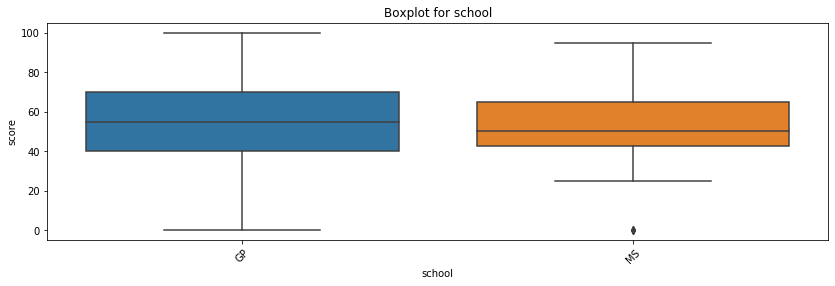

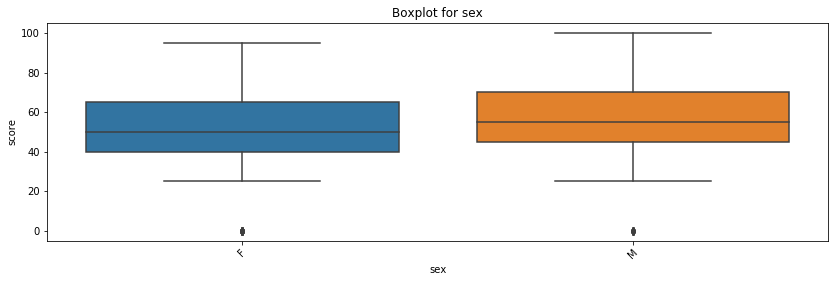

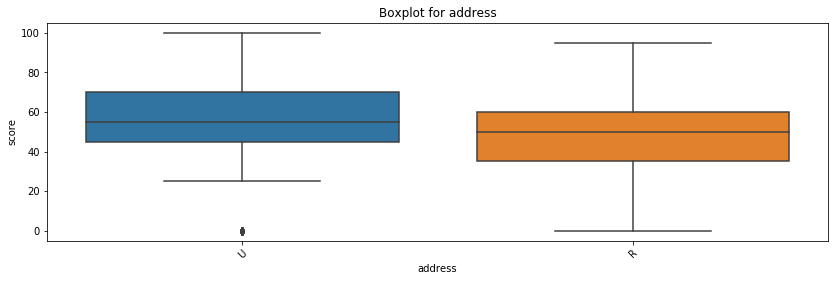

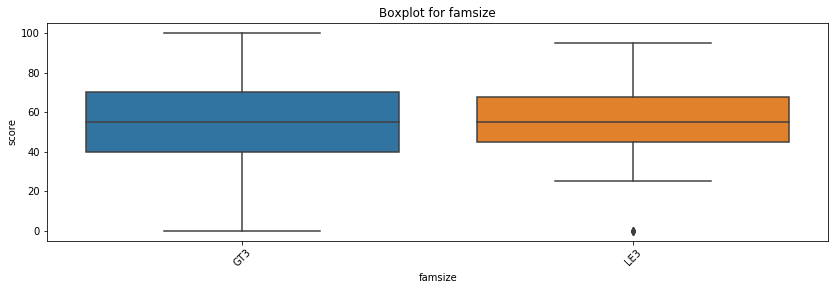

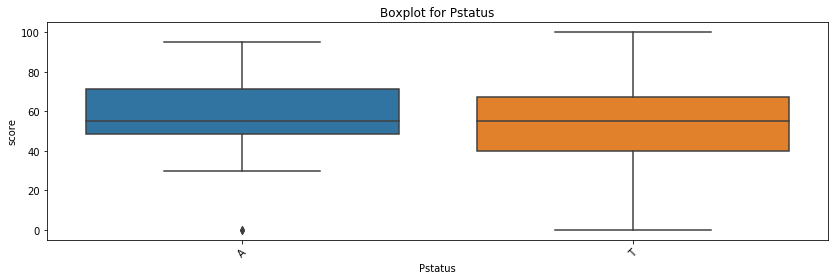

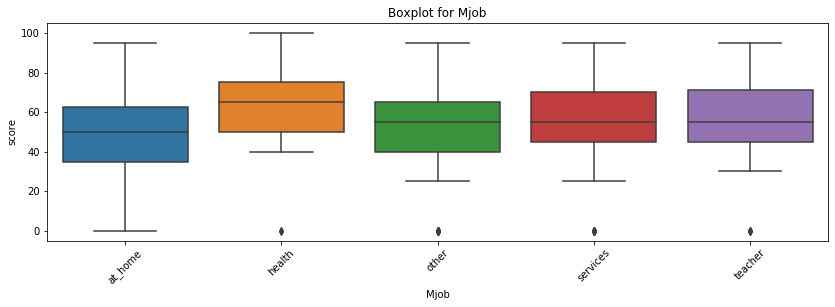

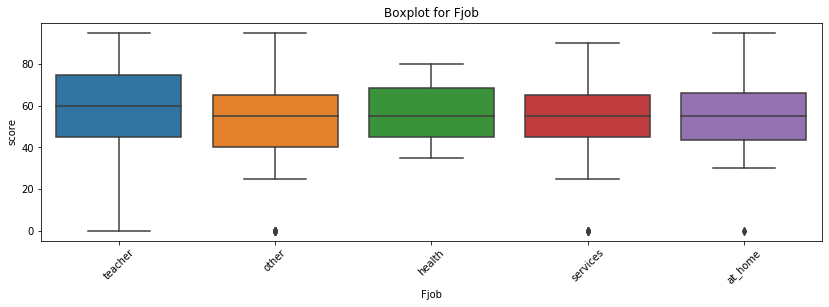

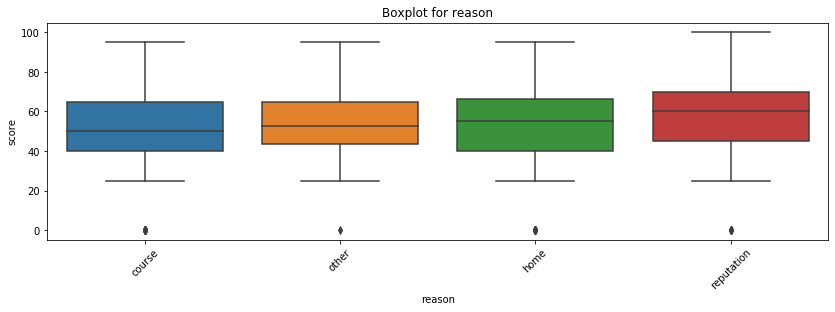

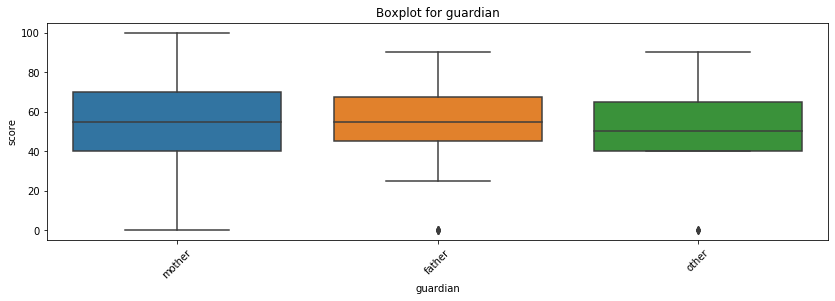

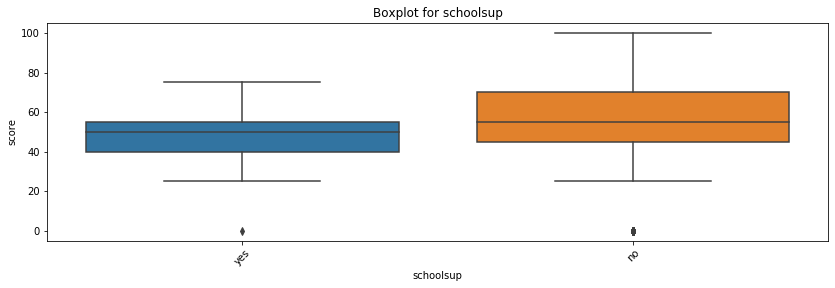

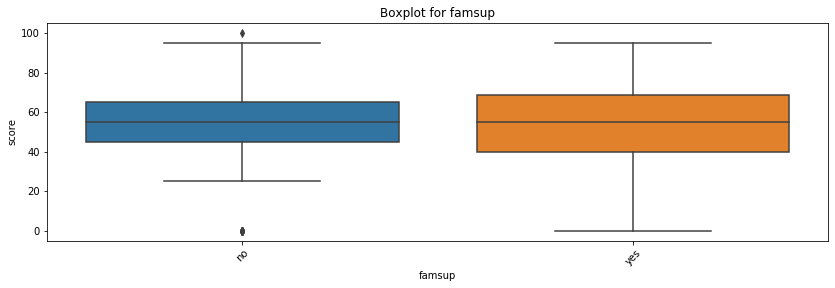

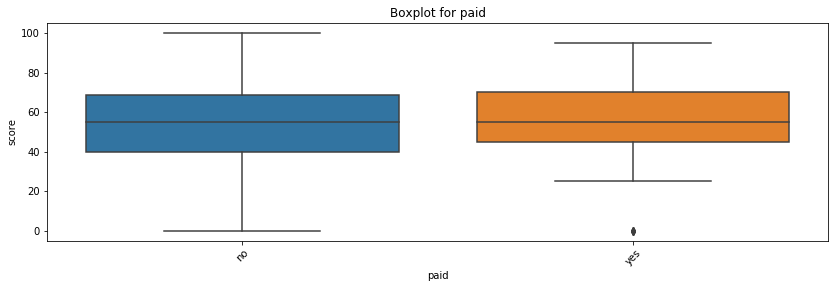

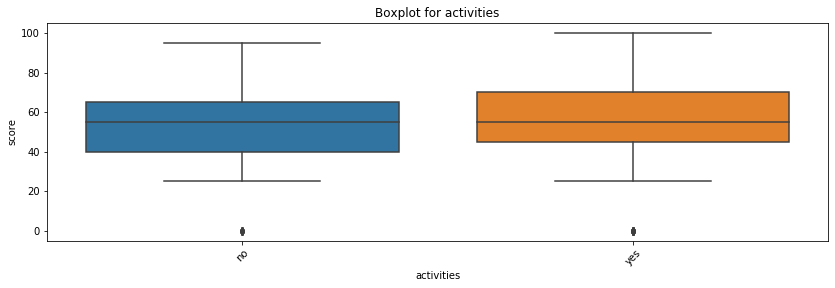

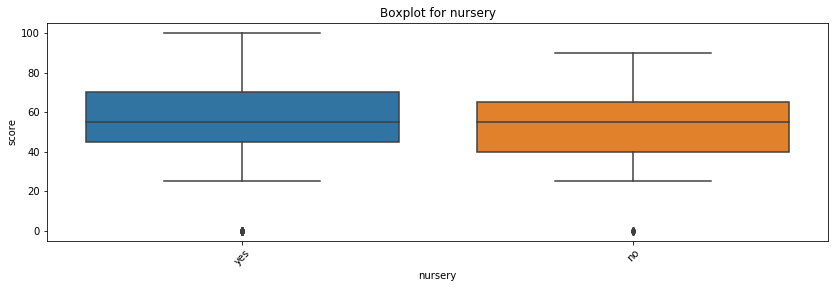

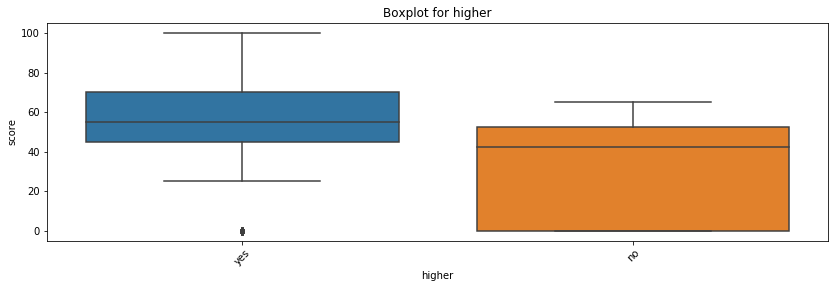

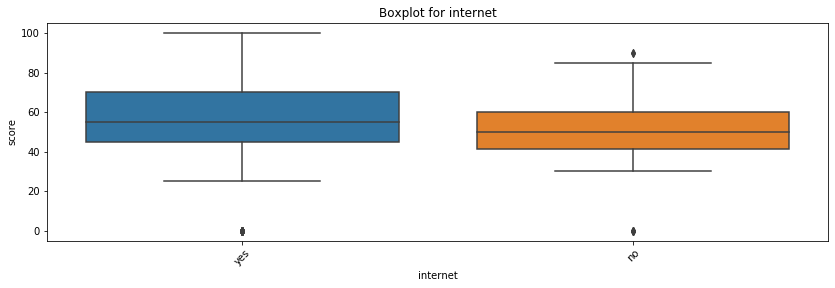

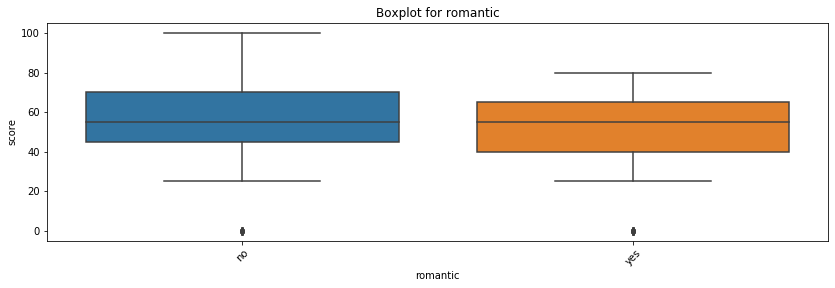

In [77]:
for col in obj_col:
    get_boxplot(col)